# Problem 2. Grocery retailer.
**A large, national grocery retailer tracks productivity and costs of its facilities closely. 
Data below were obtained from a single distribution center for a one-year period. Each
data point for each variable represents one week of activity. The variables included are 
the number of cases shipped (X1), the indirect costs of the total labor hours as a 
percentage (X2), a qualitative predictor called holiday that is coded 1 if the week has a 
holiday and 0 otherwise (X3), and the total labor hours (Y).**
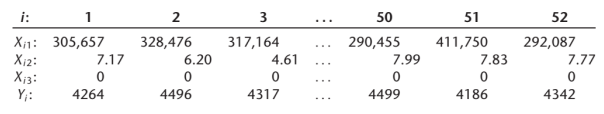

**b. Obtain the diagonal element of the hat matrix. Identify any outlying X observations.**

**c. Management wishes to predict the total labor hours required to handle the next 
shipment containing X1 = 300,000 cases whose indirect costs of the total hours is X2 = 
7.2 and X3 = 0 (no holiday in week). Construct a scatter plot of X2 against X1 and 
determine visually whether this prediction involves an extrapolation beyond the range 
of the data. Also, use (10.29) to determine whether an extrapolation is involved. Do 
your conclusions from the two methods agree?**

**d. Cases 16, 22, 43, and 48 appear to be outlying X observations, and cases 10, 32, 38, 
and 40 appear to be outlying Y observations. Obtain the DFFITS, DFBETAS, and 
Cook’s distance values for each of these cases to assess their influence. What do you 
conclude?**

**e. Calculate Cook’s distance Di for each case and prepare an index plot. Are any cases
influential according to this measure?**

In [59]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('CH06PR09.txt', sep = '\s+', header =None, names=['Y','X1','X2','X3'])
df.head()

,Y,X1,X2,X3
0,4264,305657,7.17,0
1,4496,328476,6.20,0
2,4317,317164,4.61,0
3,4292,366745,7.02,0
4,4945,265518,8.61,1


In [33]:
x1= df['X1']
x2= df['X2']
x3= df['X3']
y= df['Y']

**b. Obtain the diagonal element of the hat matrix. Identify any outlying X observations.**

In [34]:
n = len(y)
p = 4
h = (2*p)/n
print('H =',h)
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x2+x3', data=df)
results = model.fit()

test_class = OLSInfluence(results)
dir(test_class)
test_class.hat_matrix_diag


H = 0.15384615384615385


array([0.02258497, 0.06179963, 0.21887726, 0.05297322, 0.20632818,
       0.02712212, 0.02861964, 0.05635264, 0.04017169, 0.04826901,
       0.03011634, 0.04977033, 0.02761134, 0.06047246, 0.03756448,
       0.25542493, 0.03324965, 0.05104935, 0.02561758, 0.02491881,
       0.19360472, 0.25771995, 0.05677233, 0.07959049, 0.05613301,
       0.02189441, 0.0269728 , 0.06097409, 0.03684681, 0.04174658,
       0.03663401, 0.09602318, 0.04193292, 0.02517837, 0.04621057,
       0.06622225, 0.03108517, 0.03204566, 0.04903249, 0.03210502,
       0.04373193, 0.12395571, 0.28685861, 0.22002363, 0.11050577,
       0.03159426, 0.06494377, 0.28177664, 0.02446692, 0.03420197,
       0.10278142, 0.02754093])

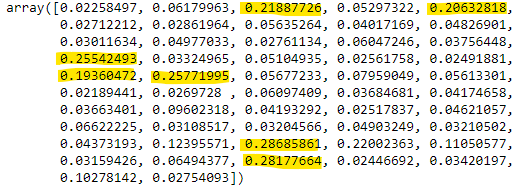
* **Case 3: 0.21887726**
* **Case 5: 0.20632818**
* **Case 16: 0.25542493**
* **Case 21: 0.19360472**
* **Case 22: 0.25771995**
* **Case 43: 0.28685861**
* **Case 44: 0.22002363**
* **Case 48: 0.28177664**


**=> The diagonal elements of the hat matrix of case 3 , 5, 16, 21, 22, 43, 44, and 48 exceed twice the mean leverage value. They are considered as outliers**

**c. Management wishes to predict the total labor hours required to handle the next shipment containing X1 = 300,000 cases whose indirect costs of the total hours is X2 = 7.2 and X3 = 0 (no holiday in week). Construct a scatter plot of X2 against X1 and determine visually whether this prediction involves an extrapolation beyond the range of the data. Also, use (10.29) to determine whether an extrapolation is involved. Do your conclusions from the two methods agree?**

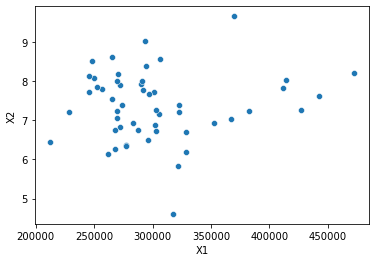

In [35]:
sns.scatterplot(x=x1, y= x2, data =df);

X'_new = [ 1 300,000 7.2 0 ]
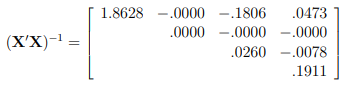
hnew, new = .01829, no extrapolation

**d. Cases 16, 22, 43, and 48 appear to be outlying X observations, and cases 10, 32, 38, 
and 40 appear to be outlying Y observations. Obtain the DFFITS, DFBETAS, and 
Cook’s distance values for each of these cases to assess their influence. What do you 
conclude?**

**Cook’s distance**

In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.set_printoptions(suppress=True)
influence = results.get_influence()
cooks = influence.cooks_distance
print(cooks[0])

[0.00029593 0.02447558 0.00208065 0.00210645 0.02299628 0.00027356
 0.00906669 0.02148586 0.00992029 0.04935012 0.00679854 0.00075503
 0.00124502 0.03875147 0.00026066 0.07689508 0.01381267 0.00397261
 0.00389968 0.0107533  0.00876289 0.00077461 0.01124087 0.00742601
 0.00182761 0.00015415 0.00215776 0.00287149 0.00181756 0.00029833
 0.0092834  0.09975974 0.02661839 0.01796257 0.03245103 0.00424634
 0.00782168 0.03463803 0.00778751 0.03649915 0.00049195 0.01276193
 0.07921931 0.01341707 0.00242642 0.00265884 0.01898976 0.00549887
 0.00000234 0.02274285 0.05313716 0.00147602]


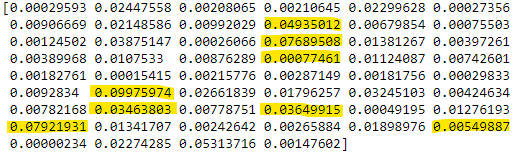

* **Case 16: 0.0769**
* **Case 22: 0.0008**
* **Case 43: 0.0792**
* **Case 48: 0.0055**
* **Case 10: 0.0494**
* **Case 32: 0.0998**
* **Case 38: 0.0346**
* **Case 40: 0.0365**

**DFFITS**

In [58]:
dffits = influence.dffits
print (dffits)

(array([-0.03406335,  0.31452483, -0.09030093, -0.09097388,  0.30122687,
        0.0327464 , -0.19090788, -0.29454043, -0.19909146,  0.45863297,
        0.16468907, -0.05441298, -0.06995876, -0.39974208,  0.03196095,
       -0.55399026,  0.23658593, -0.12512291,  0.12435794, -0.20892003,
       -0.18554251,  0.05508583, -0.21147763,  0.17115741,  0.08471422,
       -0.02457823,  0.09223019, -0.10624622,  0.08454026, -0.03419262,
       -0.19265267, -0.65107706,  0.33139277,  0.2732792 , -0.36689707,
       -0.12928618, -0.1768339 ,  0.38551766, -0.17575513,  0.3967203 ,
        0.04391492,  0.22441652,  0.56165186,  0.22969393,  0.09756525,
       -0.10239634, -0.27588168, -0.14684146,  0.00302436,  0.30677823,
       -0.46528358,  0.07619914]), 0.5547001962252291)


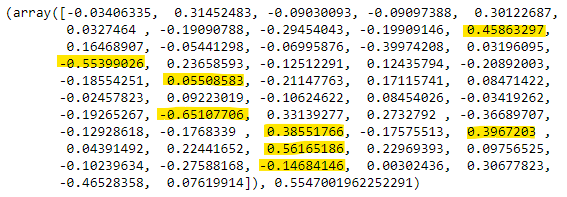


* **Case 16: -0.554**
* **Case 22: 0.055**
* **Case 43: 0.562**
* **Case 48: -0.147**
* **Case 10: 0.459**
* **Case 32: -0.651**
* **Case 38: 0.386**
* **Case 40: 0.397**

**DFBETAS**

In [49]:
dfbetas = pd.concat([pd.DataFrame(influence.dfbetas, columns = ['dfb_intercept', 'dfb_pctmetro', 'dfb_poverty', 'dfb_single'])], axis = 1)
print (dfbetas)

    dfb_intercept  dfb_pctmetro  dfb_poverty  dfb_single
0       -0.007459     -0.002714     0.006206    0.010689
1        0.167778      0.104486    -0.238319   -0.040585
2       -0.068934     -0.014358     0.085368    0.000549
3        0.009435     -0.066932     0.025312    0.019826
4       -0.048128     -0.082695     0.109284    0.244168
5        0.015085      0.001275    -0.014588   -0.008288
6       -0.079590      0.091650     0.011611    0.050624
7       -0.247737      0.090727     0.204290    0.034349
8       -0.133642      0.002884     0.134163    0.034015
9        0.364075     -0.104403    -0.314159   -0.063346
10       0.089702     -0.075212    -0.037264   -0.039532
11      -0.043534      0.012159     0.037881    0.007270
12      -0.038686      0.018090     0.025174    0.017251
13       0.247429      0.005724    -0.319297    0.116867
14       0.010756      0.012500    -0.017506   -0.006780
15      -0.247689     -0.059782     0.324815   -0.452100
16       0.157025     -0.088636

**DFBETA_0:**
* **Case 16: −0.2477**
* **Case 22: 0.0304**
* **Case 43: −0.3578**
* **Case 48: 0.0450**
* **Case 10: 0.3641**
* **Case 32: 0.4095**
* **Case 38: -0.0996**
* **Case 40: 0.0738**

**DFBETA_1:**
* **Case 16: −0.0598**
* **Case 22: -0.0253**
* **Case 43: 0.1338**
* **Case 48: -0.0938**
* **Case 10: -0.1044**
* **Case 32: 0.0913**
* **Case 38: -0.0827**
* **Case 40: -0.2121**

**DFBETA_2:**
* **Case 16: 0.3248**
* **Case 22: -0.0107**
* **Case 43: 0.3262**
* **Case 48: 0.0090**
* **Case 10: -0.3142**
* **Case 32: -0.5708**
* **Case 38: 0.2084**
* **Case 40: 0.0933**

**DFBETA_3:**
* **Case 16: -0.4521**
* **Case 22: 0.0446**
* **Case 43: 0.3566**
* **Case 48: -0.1022**
* **Case 10: -0.0633**
* **Case 32: 0.1652**
* **Case 38: -0.1270**
* **Case 40: -0.1110**

In [77]:
DFD = {'DFFITS':['−.554','.055','.562','−.147','.459','−.651','.386','.397'],
           "Cook's_D":['.0769','.0008','.0792','.0055','.0494','.0998','.0346','.0365'],
    'DFBETA_0':['−.2477','.0304','−.3578','.0450','.3641','.4095','−.0996','.0738'],
          'DFBETA_1':['−.0598','−.0253','.1338','−.0938','−.1044','.0913','−.0827','−.2121'],
           'DFBETA_2':['.3248','−.0107','.3262','.0090','−.3142','−.5708','.2084','.0933'],
           'DFBETA_3':['−.4521','.0446','.3566','−.1022','−.0633','.1652','−.1270','−.1110']
          }
D = pd.DataFrame(DFD)
D.index = ['Case 16:','Case 22:','Case 43:','Case 48:','Case 10:','Case 32:','Case 38:','Case 40:']
print(D)

         DFFITS Cook's_D DFBETA_0 DFBETA_1 DFBETA_2 DFBETA_3
Case 16:  −.554    .0769   −.2477   −.0598    .3248   −.4521
Case 22:   .055    .0008    .0304   −.0253   −.0107    .0446
Case 43:   .562    .0792   −.3578    .1338    .3262    .3566
Case 48:  −.147    .0055    .0450   −.0938    .0090   −.1022
Case 10:   .459    .0494    .3641   −.1044   −.3142   −.0633
Case 32:  −.651    .0998    .4095    .0913   −.5708    .1652
Case 38:   .386    .0346   −.0996   −.0827    .2084   −.1270
Case 40:   .397    .0365    .0738   −.2121    .0933   −.1110


**e. Calculate Cook’s distance Di for each case and prepare an index plot. Are any cases influential according to this measure?**

Case 16: .161%, case 22: .015%, case 43: .164%, case 48: .042%,
case 10: .167%, case 32: .227%, case 38: .152%, case 40: .157%